In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import RocCurveDisplay, roc_auc_score

In [18]:
X, y = load_iris(return_X_y = True)
#print(X)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 10)
# stratify=y test에 활용될 target값을 균일하게 주세요 하는 것이다.
print(y_test)
print(np.unique(y_test, return_counts=True))

m = LogisticRegression(solver = 'liblinear')
#m = SGDClassifier(loss = 'log_loss')
m.fit(X_train, y_train)

print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))

print('test pred : ', m.predict(X_test))
print('test targer :', y_test)

[1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 1 1 1 0
 2]
(array([0, 1, 2]), array([12, 13, 13]))
train score :  0.9642857142857143
test score :  0.9736842105263158
test pred :  [1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 2 1 1 0
 2]
test targer : [1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 1 1 1 0
 2]


#### LogisticRegression은 이미 과적합을 막기위해 L1값을 주고있다.

#### $ 오즈비(odds ratio) = p / (1-p) $
- $ p : 성공확률 $
- $ 1-p : 실패확률 $

> $ 로짓 (logit), z = log(odds_ratio) = log(p/(1-p)) $

*decision function*

> $ z = intercept + coef_i*x_i $

*proba*

> $ p = 1/(1+e^{-z}) $

In [28]:
print(m.predict(X_test))
print(m.coef_, m.intercept_)
# 0.39290018*x + 1.36102732*x + -2.12425585*x + -0.92019062*x +0.27094323 ==> class =0일확률이다. 1, 2도 동일
print(m.predict_proba(X_test))
# 4.81216933e-02 7.99299930e-01 1.52578377e-01 이중에 가장 확률이 높은 것으로 대답을 주는 것이다.
# 7.99299930e-01 이것이 가장 크기 때문에 2번쨰 품종이다.
print(m.decision_function(X_test))

[1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 2 1 1 0
 2]
[[ 0.39290018  1.36102732 -2.12425585 -0.92019062]
 [ 0.52205527 -1.53419324  0.37077866 -1.01447023]
 [-1.69442156 -1.16444044  2.35357227  2.04617696]] [ 0.27094323  0.60188714 -0.94206978]
[[4.81216933e-02 7.99299930e-01 1.52578377e-01]
 [1.28969815e-02 5.46418375e-01 4.40684643e-01]
 [1.58331416e-03 3.95460869e-01 6.02955816e-01]
 [8.12953101e-04 3.91361151e-01 6.07825896e-01]
 [8.04112439e-04 1.79059226e-01 8.20136661e-01]
 [1.51750569e-02 5.29140382e-01 4.55684561e-01]
 [8.45729334e-01 1.54208916e-01 6.17496189e-05]
 [3.62370926e-04 2.42963704e-01 7.56673925e-01]
 [3.08622177e-04 4.32306320e-01 5.67385058e-01]
 [8.50364557e-01 1.49496789e-01 1.38653764e-04]
 [1.25217053e-02 5.53819984e-01 4.33658311e-01]
 [2.68628497e-02 5.90746669e-01 3.82390481e-01]
 [1.30714549e-01 7.06389879e-01 1.62895571e-01]
 [2.08257706e-02 5.81315948e-01 3.97858281e-01]
 [8.72458722e-01 1.27498989e-01 4.22892193e-05]
 [3.57756

In [31]:
#print(X_test)
#print(m.coef_)
#print(m.intercept_)

# X_test 내 샘플들의 class 0번일 확률을 구하는 decision_function
t1 = X_test * m.coef_[0]
t1 = t1.sum(axis =1)
t1 = t1+m.intercept_[0]
print(t1)
print(m.decision_function(X_test))

[-3.59806438 -4.48038926 -6.2208588  -6.94676631 -7.01397034 -4.43404841
  3.56883795 -7.78875517 -7.71704185  3.27557515 -4.65765584 -3.9721644
 -2.46761527 -4.30912752  3.88033343 -5.74900413  2.73567859 -3.51243351
  3.04247558  2.890014   -5.33497039 -7.3515961   3.13693595 -2.56442798
 -7.32387128  3.78352072 -6.25300282 -6.43187397 -4.51619198 -6.5900611
  4.57100187  2.78868692  4.94453442 -4.46375112 -3.58434607 -1.70767481
  4.24991909 -6.35752901]
[[ -3.59806438  -0.23058256  -2.3828542 ]
 [ -4.48038926  -0.10164945  -0.47780314]
 [ -6.2208588   -0.01824787   1.1275709 ]
 [ -6.94676631  -0.15010771   0.93643776]
 [ -7.01397034  -1.38591742   2.39345669]
 [ -4.43404841  -0.3684462   -0.60960061]
 [  3.56883795  -1.5344781   -9.55259444]
 [ -7.78875517  -0.95583904   1.85653409]
 [ -7.71704185   0.50361149   1.50330455]
 [  3.27557515  -1.58988089  -8.75838177]
 [ -4.65765584  -0.3403347   -0.72848113]
 [ -3.9721644   -0.378466    -1.0297861 ]
 [ -2.46761527  -0.31300644  -2.22

In [33]:
print(m.predict(X_test))
print(np.argmax(m.predict_proba(X_test), axis=1))
print(m.predict_proba(X_test))

[1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 2 1 1 0
 2]
[1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 2 1 1 0
 2]
[[4.81216933e-02 7.99299930e-01 1.52578377e-01]
 [1.28969815e-02 5.46418375e-01 4.40684643e-01]
 [1.58331416e-03 3.95460869e-01 6.02955816e-01]
 [8.12953101e-04 3.91361151e-01 6.07825896e-01]
 [8.04112439e-04 1.79059226e-01 8.20136661e-01]
 [1.51750569e-02 5.29140382e-01 4.55684561e-01]
 [8.45729334e-01 1.54208916e-01 6.17496189e-05]
 [3.62370926e-04 2.42963704e-01 7.56673925e-01]
 [3.08622177e-04 4.32306320e-01 5.67385058e-01]
 [8.50364557e-01 1.49496789e-01 1.38653764e-04]
 [1.25217053e-02 5.53819984e-01 4.33658311e-01]
 [2.68628497e-02 5.90746669e-01 3.82390481e-01]
 [1.30714549e-01 7.06389879e-01 1.62895571e-01]
 [2.08257706e-02 5.81315948e-01 3.97858281e-01]
 [8.72458722e-01 1.27498989e-01 4.22892193e-05]
 [3.57756999e-03 3.04239167e-01 6.92183263e-01]
 [7.77278310e-01 2.22588246e-01 1.33443556e-04]
 [5.99115626e-02 8.0785820

![스크린샷 2023-05-26 20-49-47](스크린샷 2023-05-26 20-49-47.png)

- TPR : True Positive Rate
- FPR : False Positive Rate

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
0.7105263157894737


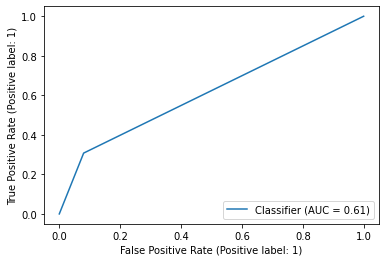

In [43]:
# confusion matrix, roc curve
X, y = load_iris(return_X_y = True)

# 두개의 레이블만 가지고 1이 되면 posstive

#X = X[:-50]
#y = y[:-50]

y = y==1
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 10)

m = LogisticRegression(solver = 'liblinear')
#m = SGDClassifier(loss = 'log_loss')
m.fit(X_train, y_train)
print(m.score(X_test, y_test))
RocCurveDisplay.from_predictions(y_test, m.predict(X_test))

# TPR과 FPR의 비율
# TPR : 맞았는데 그 원래값이 맞는거고
# FPR : 틀렸는데 그 원래값이 맞는거다.